In [2]:
print("Hello World 2")

Hello World 2


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
print(tf.__version__)
print(tf.test.gpu_device_name)

2.17.1
<function gpu_device_name at 0x7d4491adb5b0>


### Normalize Data

In [32]:
# this data is accessed from google colab. take project there
mnist = keras.datasets.mnist.load_data()
(train_features, train_labels) , (test_features, test_labels) = mnist

train_features = train_features.reshape(-1, 784)
train_features_n = train_features / 255
test_features = test_features.reshape(-1, 784)
test_features_n = test_features / 255
train_labels_n =  to_categorical(train_labels)
test_labels_n =  to_categorical(test_labels)

print(train_features_n.shape, train_labels_n.shape)
print(test_features_n.shape, test_labels_n.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


### Define NN Model

In [93]:
NN = keras.Sequential([])
NN.add(keras.layers.Dense(units= 70, activation="relu", input_shape=[784]))
NN.add(keras.layers.Dense(units= 35, activation="relu"))
NN.add(keras.layers.Dense(units= 10, activation="softmax"))
# loss = keras.losses.categorical_crossentropy()
NN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['categorical_accuracy'])
NN.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 350)                 │         274,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 10)                  │           3,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 893,700 (3.41 MB)

 Trainable params: 893,700 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

### Train Model

In [94]:
NN.fit(train_features_n, train_labels_n, batch_size=32, epochs=20, validation_data=(test_features_n, test_labels_n))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - categorical_accuracy: 0.9100 - loss: 0.2981 - val_categorical_accuracy: 0.9703 - val_loss: 0.1015
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - categorical_accuracy: 0.9738 - loss: 0.0803 - val_categorical_accuracy: 0.9773 - val_loss: 0.0718
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9842 - loss: 0.0498 - val_categorical_accuracy: 0.9772 - val_loss: 0.0797
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - categorical_accuracy: 0.9880 - loss: 0.0362 - val_categorical_accuracy: 0.9806 - val_loss: 0.0761
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9904 - loss: 0.0288 - val_categorical_accuracy: 0.9780 - val_loss: 0.0799
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9924 - loss: 0.0243 - val_categorical_accuracy: 0.9827 - val_loss: 0.0646
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
9 9


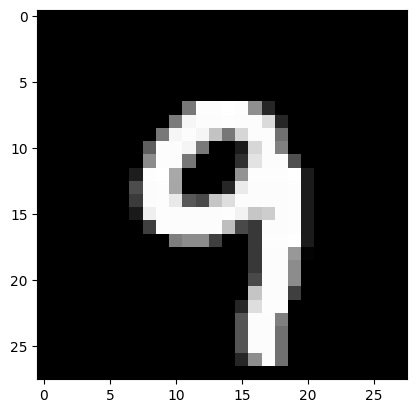

In [88]:
def denormalize(img_n):
  img = img_n * 255
  img = img.reshape(-1,28,28)
  return img

train_predicts_n = NN.predict(train_features_n)
test_predicts_n = NN.predict(test_features_n)

idx = 4319
print(test_labels[idx], np.argmax(test_predicts_n[idx]))
plt.gray()
plt.imshow(test_features[idx].reshape(28,28))
plt.show()